In [1]:
#Importation et chargement des données nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option("display.max_columns", None)

df = pd.read_csv("../data/zomato.csv", encoding="latin-1")
df.shape

(51717, 17)

In [2]:
#On va explorer notre dataset
df.head()
df.info()
df.isna().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

np.int64(0)

Le dataset contient 51 717 restaurants et 17 variables.
Certaines colonnes présentent un taux élevé de valeurs manquantes
(notamment `dish_liked`, `reviews_list`, `menu_item`).

In [3]:
#Nettoyage des données recueillies
df_clean = df.copy()

df_clean["rate"] = df_clean["rate"].astype(str)
df_clean["rate"] = df_clean["rate"].replace(["NEW", "-"], np.nan)
df_clean["rate"] = df_clean["rate"].str.split("/").str[0]
df_clean["rate"] = pd.to_numeric(df_clean["rate"], errors="coerce")

df_clean["approx_cost(for two people)"] = (
    df_clean["approx_cost(for two people)"]
    .astype(str)
    .str.replace(",", "")
)
df_clean["approx_cost(for two people)"] = pd.to_numeric(
    df_clean["approx_cost(for two people)"], errors="coerce"
)

df_clean["votes"] = pd.to_numeric(df_clean["votes"], errors="coerce")

df_clean = df_clean.drop_duplicates()

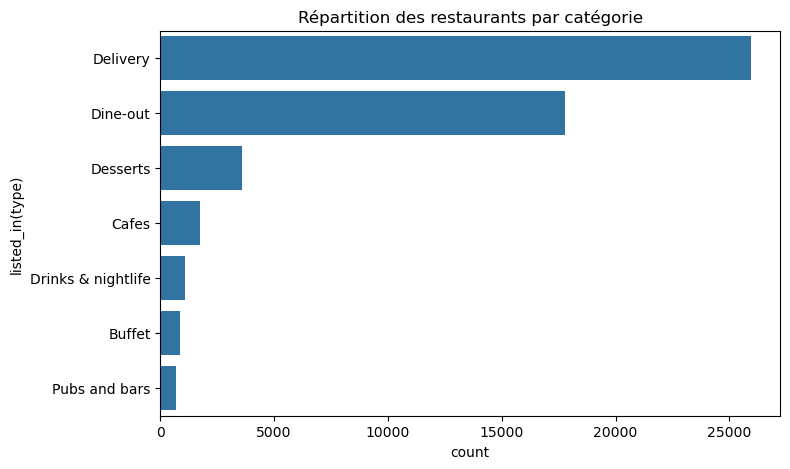

In [4]:
#On analyse à présent les restaurants
df_clean["rest_type"].value_counts().head(10)
df_clean["cuisines"].value_counts().head(10)
#GRAPHIQUE
plt.figure(figsize=(8,5))
sns.countplot(
    y=df_clean["listed_in(type)"],
    order=df_clean["listed_in(type)"].value_counts().index
)
plt.title("Répartition des restaurants par catégorie")
plt.show()

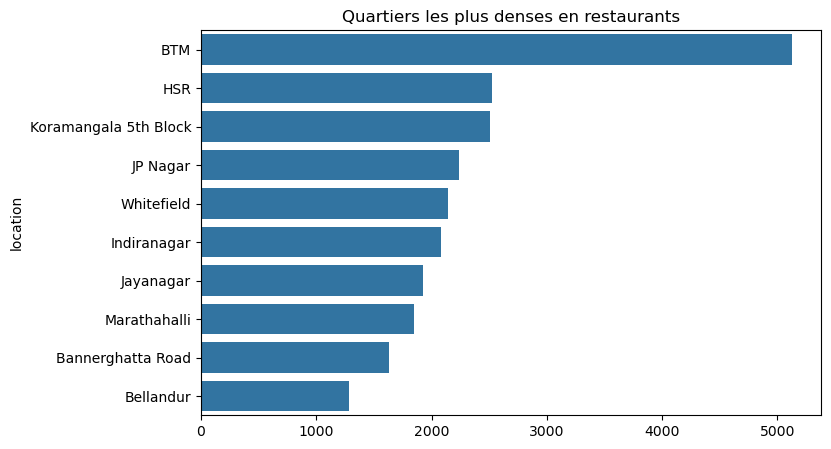

In [5]:
#On éffectue maintenant une analyse géopgraphique
top_locations = df_clean["location"].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title("Quartiers les plus denses en restaurants")
plt.show()

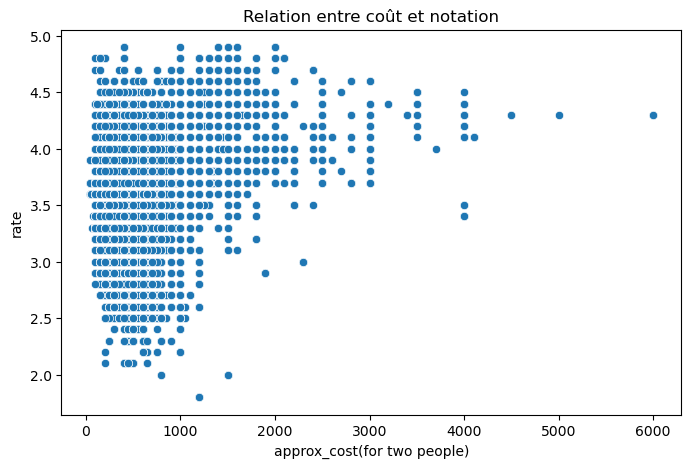

In [6]:
#On va déterminer la popularité et le prix
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df_clean["approx_cost(for two people)"],
    y=df_clean["rate"]
)
plt.title("Relation entre coût et notation")
plt.show()

In [7]:
#Sélection des cuisines les plus fréquentes
top_cuisines = df_clean["cuisines"].value_counts().head(10).index

cuisine_analysis = (
    df_clean[df_clean["cuisines"].isin(top_cuisines)]
    .groupby("cuisines")
    .agg(
        note_moyenne=("rate", "mean"),
        cout_moyen=("approx_cost(for two people)", "mean"),
        nb_restaurants=("name", "count")
    )
    .reset_index()
)
cuisine_analysis

,cuisines,note_moyenne,cout_moyen,nb_restaurants
0,Bakery,3.546419,330.261137,651
1,"Bakery, Desserts",3.671220,414.861573,911
2,Biryani,3.442200,311.967213,918
3,Cafe,3.636137,520.730028,756
4,Desserts,3.816515,372.828947,766
5,Fast Food,3.481625,281.453634,803
6,North Indian,3.588044,488.050139,2913
7,"North Indian, Chinese",3.408182,494.867480,2385
8,South Indian,3.629092,248.232711,1828
9,"South Indian, North Indian, Chinese",3.540820,365.566298,726


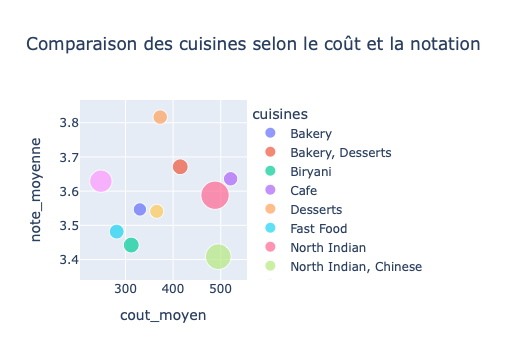

In [8]:
#Comparaison des cuisines
fig = px.scatter(
    cuisine_analysis,
    x="cout_moyen",
    y="note_moyenne",
    size="nb_restaurants",
    color="cuisines",
    title="Comparaison des cuisines selon le coût et la notation"
)
fig.show()